In [1]:
import pandas as pd
from collections import  Counter

import gensim
import pyLDAvis.gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

import unicodedata
import re
import inflect
import contractions

C:\Users\keerr\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
C:\Users\keerr\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\keerr\Anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [2]:
df = pd.read_csv("./../Data/Train_Data/train.csv")

In [3]:
df.head()

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.2
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.1
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.4
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.0
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.1


In [4]:
def denoise_text(text):
    text = contractions.fix(text)
    return text

In [5]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [6]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [7]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [8]:
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

In [9]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [10]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [11]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [12]:
def normalize_text(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

In [13]:
def tokenize(text):
    return nltk.word_tokenize(text)

In [14]:
def text_prepare(text):
    text = denoise_text(text)
    text = ' '.join([x for x in normalize_text(tokenize(text))])
    return text

In [15]:
humor = df['is_humor']==1
df_new = df[humor]
df_new.head(10)

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.20
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.10
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.40
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.00
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.10
7,8,ME: I'm such an original. Truly one of a kind....,1,1.79,1.0,0.00
11,12,What's the difference between a Mormon man and...,1,2.20,0.0,2.95
12,13,Stop calling 9-1-1 because you've run out of t...,1,1.50,1.0,0.00
13,14,When you march the streets shouting with peopl...,1,2.16,1.0,0.20
17,18,"You can make any sentence creepier by adding ""...",1,1.78,1.0,0.20


In [16]:
df_new['text'] = [text_prepare(x) for x in df_new['text']]

C:\Users\keerr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_new.head(10)

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,ten best stat nobody ev com clos elev walk roo...,1,2.42,1.0,0.20
1,2,man insert advert class wif want next day rece...,1,2.50,1.0,1.10
2,3,many men tak op beer non op tim bring couch,1,1.95,0.0,2.40
3,4,tell mom hit 1200 twit follow point broth own ...,1,2.11,1.0,0.00
4,5,ros dead lov fak wed bas fun cak,1,2.78,0.0,0.10
7,8,origin tru on kind also hold glass whit win lo...,1,1.79,1.0,0.00
11,12,diff mormon man muslim man mormon man get 72 v...,1,2.20,0.0,2.95
12,13,stop cal 911 run toilet pap ye run toilet pap ...,1,1.50,1.0,0.00
13,14,march streets shout peopl civil disobedy drink...,1,2.16,1.0,0.20
17,18,mak send creepy ad con two con adult rid tande...,1,1.78,1.0,0.20


## Most frequent words that are not stopwords

In [18]:
stop = set(stopwords.words('english'))

In [19]:
corpus = []
text = df_new['text'].str.split()
text = text.values.tolist()
corpus=[word for i in text for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 15 artists>

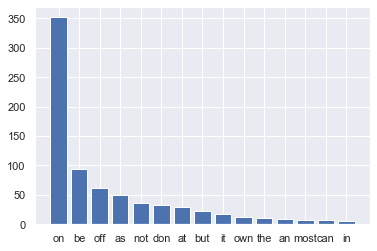

In [20]:
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
x,y = zip(*top)
plt.bar(x,y)

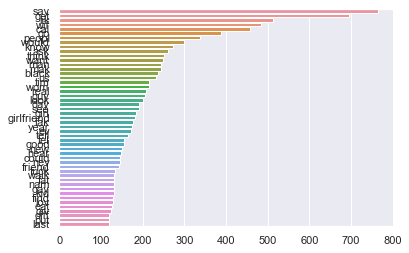

In [21]:
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [22]:
most

[('say', 765),
 ('get', 694),
 ('lik', 512),
 ('wif', 485),
 ('cal', 458),
 ('go', 389),
 ('on', 352),
 ('peopl', 338),
 ('would', 299),
 ('know', 273),
 ('ask', 260),
 ('think', 251),
 ('want', 249),
 ('man', 244),
 ('mak', 243),
 ('black', 236),
 ('us', 231),
 ('tim', 216),
 ('wom', 215),
 ('real', 209),
 ('guy', 205),
 ('look', 200),
 ('day', 192),
 ('see', 191),
 ('girl', 185),
 ('girlfriend', 182),
 ('tak', 176),
 ('year', 174),
 ('ev', 173),
 ('tell', 165),
 ('tel', 156),
 ('good', 156),
 ('new', 150),
 ('hear', 148),
 ('could', 145),
 ('nev', 145),
 ('friend', 143),
 ('fuck', 134),
 ('walk', 132),
 ('fat', 132),
 ('nam', 131),
 ('gay', 131),
 ('kid', 130),
 ('find', 129),
 ('lov', 128),
 ('eat', 127),
 ('giv', 125),
 ('diff', 120),
 ('put', 119),
 ('last', 119),
 ('work', 119),
 ('start', 118),
 ('back', 117),
 ('thing', 117),
 ('today', 117),
 ('drink', 114),
 ('car', 114),
 ('alway', 114),
 ('night', 113),
 ('com', 112),
 ('doct', 112),
 ('nee', 108),
 ('way', 108),
 ('old', 1

## Topic Modeling using LDA

In [23]:
def preprocess_data(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for d in df['text']:
        words = [w for w in word_tokenize(d) if (w not in stop)]
        
        words = [lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus = preprocess_data(df_new)

In [24]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dic,                                    
                                   passes = 50,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.020*"lik" + 0.011*"real" + 0.010*"get" + 0.008*"kid" + 0.006*"nam" + 0.006*"tim" + 0.006*"new" + 0.006*"girlfriend" + 0.006*"peopl" + 0.006*"know"'),
 (1,
  '0.020*"get" + 0.019*"peopl" + 0.013*"wif" + 0.013*"lik" + 0.011*"black" + 0.008*"say" + 0.007*"lov" + 0.007*"fat" + 0.006*"would" + 0.006*"know"'),
 (2,
  '0.013*"say" + 0.012*"get" + 0.011*"would" + 0.010*"wif" + 0.009*"think" + 0.009*"want" + 0.008*"lik" + 0.008*"day" + 0.007*"tel" + 0.007*"man"'),
 (3,
  '0.017*"cal" + 0.013*"say" + 0.012*"guy" + 0.009*"wif" + 0.008*"get" + 0.007*"see" + 0.006*"ask" + 0.006*"could" + 0.006*"keep" + 0.005*"car"'),
 (4,
  '0.034*"say" + 0.016*"get" + 0.014*"cal" + 0.009*"gay" + 0.008*"wif" + 0.007*"doct" + 0.007*"think" + 0.007*"mak" + 0.007*"lik" + 0.007*"jew"')]

In [26]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\keerr\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.027787  0.073775       1        1  25.841648
4     -0.009524  0.077559       2        1  22.761665
1      0.002054 -0.166083       3        1  19.132078
0      0.138643  0.004618       4        1  16.712059
3     -0.158960  0.010131       5        1  15.552552, topic_info=     Category        Freq     Term       Total  loglift  logprob
117   Default  691.000000      say  691.000000  30.0000  30.0000
72    Default  376.000000      cal  376.000000  29.0000  29.0000
87    Default  307.000000    peopl  307.000000  28.0000  28.0000
112   Default  449.000000      lik  449.000000  27.0000  27.0000
230   Default  110.000000      gay  110.000000  26.0000  26.0000
102   Default  191.000000      guy  191.000000  25.0000  25.0000
145   Default   93.000000     doct   93.000000  24.0000  24.0000
241   Default  209.000000    black  209.000000  23.0000  23.0000
1106  Default   80.000000      jew   80.000000  22.0000  22.0000
395   Default   90.000000     talk   90.000000  21.0000  21.0000
28    Default  394.000000      wif  394.000000  20.0000  20.0000
175   Default  115.000000      kid  115.000000  19.0000  19.0000
53    Default   97.000000      lov   97.000000  18.0000  18.0000
187   Default  140.000000     girl  140.000000  17.0000  17.0000
655   Default  106.000000     keep  106.000000  16.0000  16.0000
705   Default   53.000000      hat   53.000000  15.0000  15.0000
221   Default  208.000000     real  208.000000  14.0000  14.0000
166   Default  135.000000    could  135.000000  13.0000  13.0000
317   Default  123.000000      fat  123.000000  12.0000  12.0000
190   Default  223.000000    think  223.000000  11.0000  11.0000
920   Default   47.000000      cop   47.000000  10.0000  10.0000
464   Default  120.000000     work  120.000000   9.0000   9.0000
238   Default   49.000000    anyth   49.000000   8.0000   8.0000
135   Default  127.000000      nam  127.000000   7.0000   7.0000
356   Default   50.000000     meet   50.000000   6.0000   6.0000
62    Default   72.000000     whit   72.000000   5.0000   5.0000
176   Default   56.000000     stil   56.000000   4.0000   4.0000
839   Default   35.000000  problem   35.000000   3.0000   3.0000
9     Default  127.000000     walk  127.000000   2.0000   2.0000
15    Default  163.000000      day  163.000000   1.0000   1.0000
...       ...         ...      ...         ...      ...      ...
22     Topic5   21.621988     next   39.487305   1.2587  -5.8274
655    Topic5   40.369492     keep  106.686081   0.8891  -5.2030
233    Topic5   39.388599      car  105.754364   0.8733  -5.2276
525    Topic5   25.668344      god   55.847549   1.0836  -5.6558
634    Topic5   52.215019      see  176.790970   0.6413  -4.9457
1098   Topic5   19.519268    world   38.114254   1.1918  -5.9297
166    Topic5   41.186195    could  135.020386   0.6736  -5.1830
884    Topic5   25.720724      mex   62.491653   0.9732  -5.6538
117    Topic5   93.131302      say  691.289062  -0.1436  -4.3671
271    Topic5   24.341812      liv   61.297573   0.9374  -5.7089
804    Topic5   23.312647  everyon   57.382927   0.9602  -5.7521
28     Topic5   64.508575      wif  394.110657   0.0511  -4.7343
35     Topic5   34.312679      tak  133.794006   0.5002  -5.3656
161    Topic5   44.800755      ask  237.145386   0.1945  -5.0989
101    Topic5   32.704411     fuck  121.646896   0.5473  -5.4136
65     Topic5   60.364658      get  634.169861  -0.4910  -4.8007
20     Topic5   38.597149      man  237.869553   0.0424  -5.2479
619    Topic5   18.759851  instead   41.931686   1.0566  -5.9694
423    Topic5   37.606628    would  286.157288  -0.1684  -5.2739
135    Topic5   27.119371      nam  127.490875   0.3131  -5.6008
241    Topic5   30.529078    black  209.603958  -0.0656  -5.4824
1129   Topic5   24.799007      wel  105.598785   0.4121  -5.6903
173    Topic5   27.954767      wom  176.991898   0.0154  -5.5705
277 

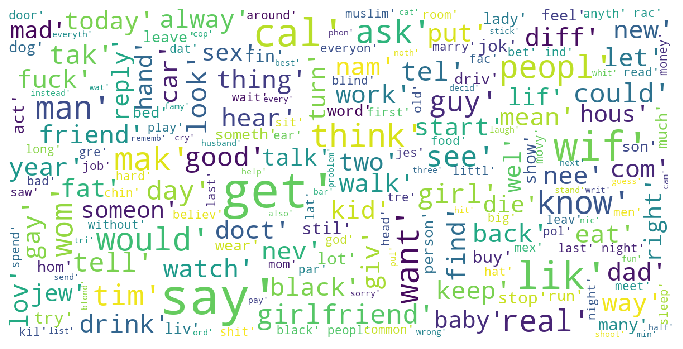

In [27]:
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)